## Generating Binaural Rythms with PyLab
PyLab is a Python environment based on matplotlib. For the uninitiated, matplotlib is a library of tools for plotting representions of scientific data. Numpy is for handling matrices, arrays, and mathematical functions as well as other mathematical tools.

These tools, along with some other basic scientific Python tools can be used to generate and play audio files with multichannel audio output. We'll be working in mono and stereo. If you are an organism with more than two pressure-detecting organs (ears), the code can easily be scaled.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
#If we try to get some more information we can see how vast Pylab is:

help(pylab)

Help on module matplotlib.pylab in matplotlib:

NAME
    matplotlib.pylab

DESCRIPTION
    This is a procedural interface to the matplotlib object-oriented
    plotting library.
    
    The following plotting commands are provided; the majority have
    MATLAB |reg| [*]_ analogs and similar arguments.
    
    .. |reg| unicode:: 0xAE
    
    _Plotting commands
      acorr     - plot the autocorrelation function
      annotate  - annotate something in the figure
      arrow     - add an arrow to the axes
      axes      - Create a new axes
      axhline   - draw a horizontal line across axes
      axvline   - draw a vertical line across axes
      axhspan   - draw a horizontal bar across axes
      axvspan   - draw a vertical bar across axes
      axis      - Set or return the current axis limits
      autoscale - turn axis autoscaling on or off, and apply it
      bar       - make a bar chart
      barh      - a horizontal bar chart
      broken_barh - a set of horizontal bars with g

In [10]:
import scipy.constants as const
import scipy
from scipy.io import wavfile
from IPython.core.display import HTML
from __future__ import division

In [11]:
## for this notebook, we need to be in the folder where the ipynb are stored.
## which for me is here :

In [12]:
# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [13]:
## some constant for our audio file
rate = 43200 #432 hz
duration = 2 # in seconds

# this will give us a sine wth our desired amplitude for a wav file
normedsin = lambda f,t : 2**13*sin(2*pi*f*t)
time = np.linspace(0, duration, num=rate*duration)

In [14]:
pwd

'C:\\Users\\X\\GitHub\\Relearn'

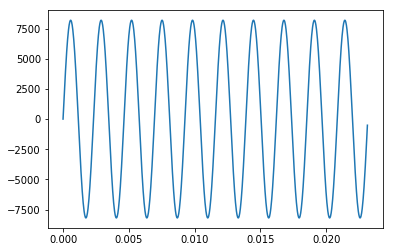

In [15]:
# define A as 432 Hz
la = lambda t : normedsin(432, t)

#Look at it on the first 25 ms
plot(time[0:1000], la(time)[0:1000])

# write the file on disk, and show in a Html 5 audio player
wavfile.write('432.wav', rate, la(time).astype(np.int16))
wavPlayer("432.wav")

That's all good and nice, but this type of data can be passed as a Numpy array and stereo channels. There's another useful way to do this.

Populating the interactive namespace from numpy and matplotlib


c:\users\x\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rate', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


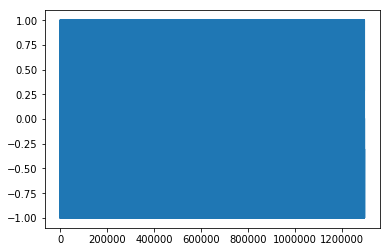

In [16]:
# Generate a sound
%pylab inline
import IPython
import numpy as np
framerate = 43200
t = np.linspace(0,18,framerate*30)
wave1 = np.sin(4*np.pi*198*t)
wave2 = np.sin(4*np.pi*202*t)
data = wave1 + wave2
IPython.display.Audio(data,rate = framerate)

# Represent the interference occurring between these who sine waves
plot(wave1)

# More than one channel can be used:
dataleft = wave1
dataright = wave2
IPython.display.Audio([dataleft, dataright],rate=framerate)

Populating the interactive namespace from numpy and matplotlib


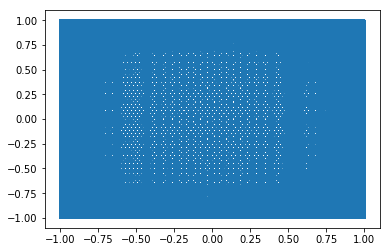

In [26]:
%pylab inline
import IPython
import numpy as np
framerate = 43200
t = np.linspace(0,18,framerate*30)
wave1 = np.sin(1*np.pi*432*t)
data = wave1
IPython.display.Audio(data,rate = framerate)

# Represent the interference occurring between these who sine waves
plot(wave1, wave2)

In [20]:
help(plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu